# 데이터 전처리
## 데이터 클리닝 : 결측치 처리, 이상치 확인 및 정제 등
## 데이터 통합 : 다양한 데이터 파일의 결합 등
## 데이터 변환 : 스케일링, 요약
## 데이터 축소 : 변수 축소, 라벨링
## 불균형 데이터 처리 : 언더 샘플링, 오버샘플링 등
## 데이터 분할 : train, test, 데이터 분할

# 이상치의 의미
### 결측치 혹은 비정상 값, 6시그마 밖의 값... 등을 의미함 이는 분석에 있어 좋지 않은 결과를 가져다 줄 수 있음. 일반적으론 1사분위수 3사분위수 바깥의 값을 의미.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target # wine에 있는 class값을 가져옴
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2: 'class_2'})

In [6]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [7]:
wine['color_intensity']

0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64

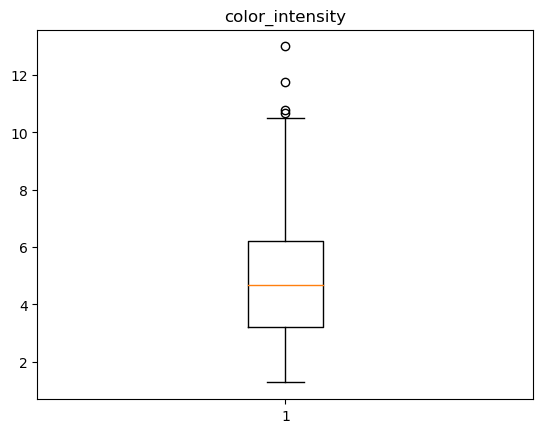

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(wine['color_intensity'], whis = 1.5)
plt.title('color_intensity')
plt.show()

In [12]:
import numpy as np
def outliers_iqr(a,b):
    quartile_1, quartile_3 = np.percentile(a[b], [25,75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = a[(a[b] > upper_whis) | (a[b] < lower_whis)]
    return outliers[[b]]


In [13]:
outliers = outliers_iqr(wine,'color_intensity')

In [15]:
outliers #이상치

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제

In [18]:
drop_outliers = wine.drop(index = outliers.index)

print(wine.shape)
print(drop_outliers.shape) #이상치 드랍 한것을 확인

(178, 14)
(174, 14)


In [25]:
outliers.index

Index([151, 158, 159, 166], dtype='int64')

In [24]:
wine.loc[outliers.index, 'color_intensity'] #outliers의 인덱스를 가져오고, color_intensity에 해당되는 열을 가져옴

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

In [26]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN #NAN 값으로 변경 

In [31]:
# NAN을 평균값 대체
wine.loc[outliers.index, 'color_intensity'] = np.NaN #NAN 값으로 변경 
wine['color_intensity'].fillna(wine['color_intensity'].mean(),inplace = True)
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

# 범주형 변수 처리

## 번주형 변수는 앞선 방법처럼 계산이 불가능 함으로 희소행렬 방식으로 변경하면 계산이 가능해짐.


In [35]:
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'versicolour', 2 : 'virginica'}) # 0,1,2,로 설정되어 있는 값을 실제 문자열 라벨로 변경하기 위함임

In [40]:
iris_dummy = pd.get_dummies(iris, columns = iris['class']) #dummies는 반환하는 컬럼의 이름을 받는다. 직접 넣어주면 됨

KeyError: "None of [Index(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',\n       'Setosa', 'Setosa', 'Setosa',\n       ...\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',\n       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],\n      dtype='object', length=150)] are in the [columns]"

In [41]:
iris_dummy = pd.get_dummies(iris, columns =['class'])

In [42]:
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_Setosa,class_versicolour,class_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


# 데이터 분할
### trian test 7:3 or train validation test 6:2:2 but these days, we have lot of data. so we usually increas the ratio of test. upper than 7:3.

In [56]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'versicolour', 2 : 'virginica'})

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(iris.drop(columns = 'class'),iris['class'], test_size = 0.2,  random_state = 1004)


In [58]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [53]:
print(y_train.shape,y_test.shape)

(120,) (30,)


In [60]:
y_train.value_counts()

class
versicolour    41
Setosa         40
virginica      39
Name: count, dtype: int64

## random state를 하면 다음에 같은 random state를 지정하면 같은 값이 나오기 때문에 모델 성능 비교에 유용하다.

## 층화 임의 추출, class의 갯수를 비율에 맞게 추출되게 하는 방식 ex) 100, 20 -> train 50 10 test 50 10

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(iris.drop(columns = 'class'),iris['class'], test_size = 0.2,  stratify = iris['class'])

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)


(120, 4) (30, 4)
(120,) (30,)


In [63]:
y_train.value_counts()

class
virginica      40
versicolour    40
Setosa         40
Name: count, dtype: int64

# 데이터 스케일링

## standard scaler = 회귀분석보다 분류분석에 더 유용하다. 정규분포로 표준화 한다고 보면됨 이상치에 민감함으로 정제 필수

In [64]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

In [66]:
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
X_test_sc = StdScaler.transform(X_test)

In [69]:
X_train_sc.max()

2.9560518332769434

## Min-max scaler = 분류보다 회귀에 유용 0~1 사이 값으로 transpose 이상치에 민감함으로 정제 필수

In [71]:
from sklearn.preprocessing import MinMaxScaler

MinScaler = MinMaxScaler()

MinScaler.fit(X_train)
Xtrain_sc = MinScaler.transform(X_train)
Xtest_sc = MinScaler.transform(X_test)

## Max Abs Scaler 회귀에 유용 이상치에 민감 -1~1사이로 값 표현

In [72]:
from sklearn.preprocessing import MaxAbsScaler
MaScaler = MaxAbsScaler()

In [73]:
MaScaler.fit(X_train)
Xtrain_sc = MaScaler.transform(X_train)
Xtest_sc = MaScaler.transform(X_test)

## Robust Scaler 평균 분산 대신 중앙값 사분위 값 사용. 중앙값 0, IQR사용 이상치 최소화

In [74]:
from sklearn.preprocessing import RobustScaler
RuScaler  = RobustScaler()

In [75]:
RuScaler.fit(X_train)
Xtrain_sc = RuScaler.transform(X_train)
Xtest_sc = RuScaler.transform(X_test)

In [76]:
print(Xtrain_sc.min(),Xtrain_sc.max(),Xtrain_sc.mean(),Xtrain_sc.std())

-1.6666666666666665 2.3333333333333335 -0.015084044624138945 0.61539710193444


In [77]:
print(Xtest_sc.min(),Xtest_sc.max(),Xtest_sc.mean(),Xtest_sc.std())

-1.1666666666666667 1.8333333333333324 -0.056799191374663036 0.5532385418042871


## 원본 스케일로 변환

In [78]:
pd.DataFrame(Xtrain_sc).head(3)

,0,1,2,3
0,0.679245,0.500000,0.400000,0.533333
1,-0.226415,-0.833333,-0.085714,0.000000
2,0.226415,-0.333333,-0.085714,0.000000


In [79]:
X_original = RuScaler.inverse_transform(Xtrain_sc)
pd.DataFrame(X_original).head(3)

,0,1,2,3
0,6.7,3.3,5.7,2.1
1,5.5,2.5,4.0,1.3
2,6.1,2.8,4.0,1.3


# 차원축소
## 변수가 많아지면 더 많은 설명력을 가질 수도 있지만, 아닐 수도 있다. -> 차원의 저주
### 자료의 크기가 많으면 차원이 많아도 되지만, 아니라면??? 차원 축소가 필요하다.
#### 설명변수의 선택에는 주성분 분석 혹은 EDA에서 상관관계가 높았던 설명 변수중 하나를 사용 하는등의.. 방법이 있으나 그냥 PCA만 하자

### PCA = 그냥 변수들 설명력 더했을때 80~85%이상 나오면 거기까지만 사용하자. 

In [80]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0 : 'Setosa', 1 : 'versicolour', 2 : 'virginica'})

In [83]:
x = iris.drop(columns = 'class')

In [85]:
x # t수치형변수만 남김

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## PCA 순서 1. scaling 2. 주성분 추출, 3.주성분 갯수 정하기. 4.newdataframe

In [86]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [87]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4)
pca_fir = pca.fit(x)

In [89]:
print(pca.singular_values_)
print(pca.explained_variance_ratio_) #두개만 쓰자 ㅋ

[20.92306556 11.7091661   4.69185798  1.76273239]
[0.72962445 0.22850762 0.03668922 0.00517871]


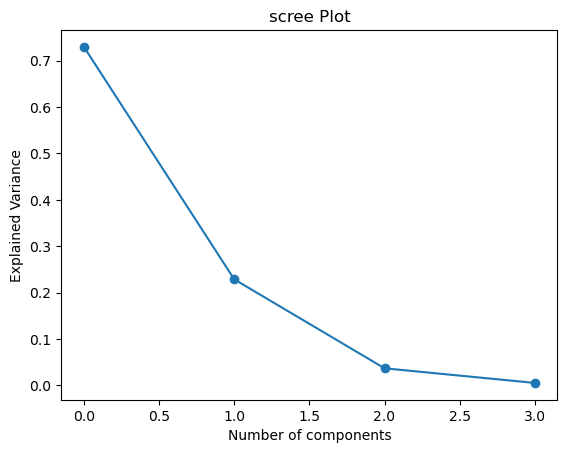

In [90]:
import matplotlib.pyplot as plt
plt.title('scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [93]:
pca = PCA( n_components = 2)

principalComponents =  pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents)


In [94]:
principal_iris 

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [95]:
principal_iris.columns = ['PC1', 'PC2']


In [96]:
principal_iris

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


C:\Users\tjtnd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tjtnd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tjtnd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tjtnd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

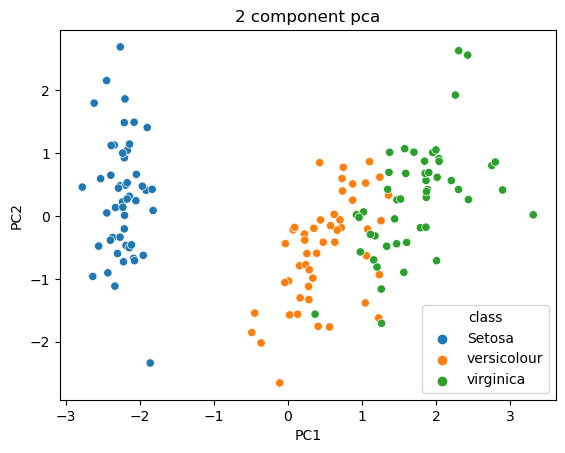

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component pca')
sns.scatterplot(x='PC1',y='PC2',hue = iris['class'], data = principal_iris)
plt.show()

## 데이터 불균형 처리
### 소수의 이상 데이터를 가려내는 것이 중요 ->ex) 암환자. 암환자를 가려내는 것이 중요함으로 언더샘플링과 오버샘플링 메소드를 사용한다.
#### 언더샘플링 : 다수의 레이블을 가진 데이터를 샘플링해서 소수의 데이터 세트가 가진 수준으로 감소시킨다
#### 오버샘플링 : 소수의 레이블을 지닌 데이터 셋을 증가시켜 다수가 가진만큼 업그레이드 한다.

In [106]:
!pip install imbalanced-learn

In [108]:
pip install --upgrade imbalanced-learn scikit-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------- ------------ 163.8/235.6 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.2 MB 10.9 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/9.2 MB 14.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.2 MB 15.9 MB/s eta 0:00:01
   ------------- ----------------

In [107]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\tjtnd\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)